In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import linregress

import matplotlib
font = {"size": 20}
matplotlib.rc("font", **font)
matplotlib.rcParams["text.usetex"] = True

import sys

sys.path.append("../models")
from linear_sscr import LinearCR

In [2]:
# Load data
data_dir = "../data/corrupted_mnist"
X = np.load(pjoin(data_dir, "foreground.npy"))
Y = np.load(pjoin(data_dir, "background.npy"))
R = np.load(pjoin(data_dir, "foreground_labels.npy")).reshape(-1, 1)

rand_idx = np.random.choice(np.arange(len(X)), size=200, replace=False)
X = X[rand_idx]
R = R[rand_idx]
rand_idx = np.random.choice(np.arange(len(Y)), size=200, replace=False)
Y = Y[rand_idx]

X_mean, Y_mean = np.mean(X, axis=0), np.mean(Y, axis=0)
X = (X - X_mean) / np.std(X, axis=0)
Y = (Y - Y_mean) / np.std(Y, axis=0)

n, p = X.shape
m, _ = Y.shape
d = 2


In [7]:
model = LinearSSCR()
model.fit(X, Y, R, d, print_every=100)

Step: 0               Log marginal lik.: -157791.25
Step: 100             Log marginal lik.: -50186.5
Step: 200             Log marginal lik.: -49511.04
Step: 300             Log marginal lik.: -49374.89
Step: 400             Log marginal lik.: -49321.73
Step: 500             Log marginal lik.: -49292.62
Step: 600             Log marginal lik.: -49274.89
Step: 700             Log marginal lik.: -49263.46
Step: 800             Log marginal lik.: -49255.85
Step: 900             Log marginal lik.: -49250.65
Step: 1000            Log marginal lik.: -49247.07
Step: 1100            Log marginal lik.: -49244.56


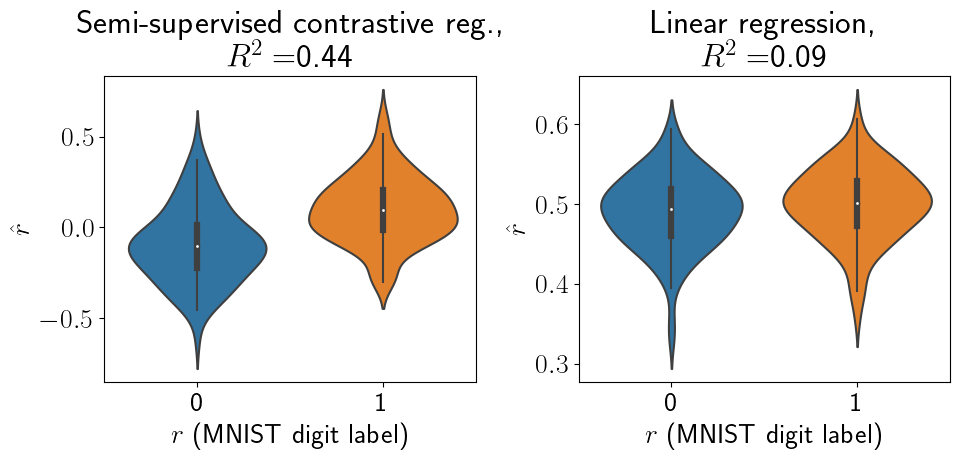

In [53]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
preds = model.predict(X)
_, _, r_value, _, _ = linregress(R.squeeze(), preds)
sns.violinplot(x=R.squeeze(), y=preds.squeeze())
plt.title("Semi-supervised contrastive reg.,\n$R^2=$" + str(round(r_value, 2)))
plt.xlabel(r"$r$ (MNIST digit label)")
plt.ylabel(r"$\hat{r}$")

plt.subplot(122)
linreg = LinearRegression()
X_reduced = PCA(n_components=d).fit_transform(X)
linreg.fit(X_reduced, R)
preds_linreg = linreg.predict(X_reduced)

_, _, r_value, _, _ = linregress(R.squeeze(), preds_linreg.squeeze())

sns.violinplot(x=R.squeeze(), y=preds_linreg.squeeze())
plt.title("Linear regression,\n$R^2=$" + str(round(r_value, 2)))
plt.xlabel(r"$r$ (MNIST digit label)")
plt.ylabel(r"$\hat{r}$")

plt.tight_layout()
plt.show()